# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt


In [2]:
#cargamos los csv en dos dataframes diferentes, fake vs real news
dataset = pd.read_csv(r"XXX\WELFake_Dataset.csv")

#Eliminamos las columnas que no nos hacen falta en este análisis
dataset.drop("Unnamed: 0",axis=1,inplace=True)
dataset.drop("title",axis=1,inplace=True)

#Revisamos el estado de los datos
print("En dataset hay {} nulos".format(dataset.isnull().sum()))

#Eliminamos los null values, ya que contamos con registros suficientes
dataset = dataset.dropna()

#Se hace un shuffle de los registros
dataset = dataset.sample(frac=1, ignore_index=True)

En dataset hay text     39
label     0
dtype: int64 nulos


In [3]:
#Generamos una función para eliminar el texto que figura antes del guión, el cual da información sobre el periódico del cual se ha extraido.

def eliminar_texto_previo(text):
    # Dividir el texto en función del guión y quedarse con la segunda parte (si existe)
    partes = text.split(" — ", 1)
    if len(partes) > 1:
        return partes[1]
    else:
        return text
   
dataset["text"] = dataset.text.apply(eliminar_texto_previo)

In [ ]:
#Quitamos stopwords y tokenizamos para el análisis
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
import string 

def tokenizado_stopwords (texto):
    texto = texto.lower() #lo pasamos a minúsculas
    palabras = word_tokenize(texto) #tokenizado del texto
    stop_words = set(stopwords.words('english')) #cargamos el set de stopwords en inglés

    #eliminamos las stopwords del texto tokenizado
    palabras_filtradas = []
    for i in palabras:
        if i not in stop_words and i not in [".",",",":",";"," ","(",")","’","“","”","@","?","-","—","_"] and i not in string.punctuation: #He intentado eliminar todos los caracteres que pueda haber en el texto y que no sean palabras
            palabras_filtradas.append(i)
    return ' '.join(palabras_filtradas)

dataset["Tokenized_text"] = dataset.text.apply(tokenizado_stopwords)

In [5]:
def conversor_target (label):
    if label == 1:
        return str("Fake")
    else:
        return str("Real")

dataset["target"] = dataset.label.apply(conversor_target)

(-100.0, 20000.0)

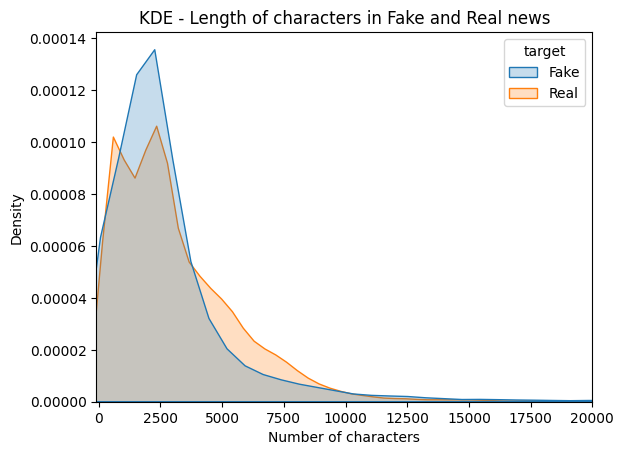

In [6]:
#contar el número de caracteres en el texto sin procesar
sns.kdeplot(data=dataset, x=dataset.text.str.len(), hue="target",fill=True)
plt.xlabel("Number of characters")
plt.ylabel("Density")
plt.title("KDE - Length of characters in Fake and Real news")
plt.xlim(-100,20000)

(0.0, 20000.0)

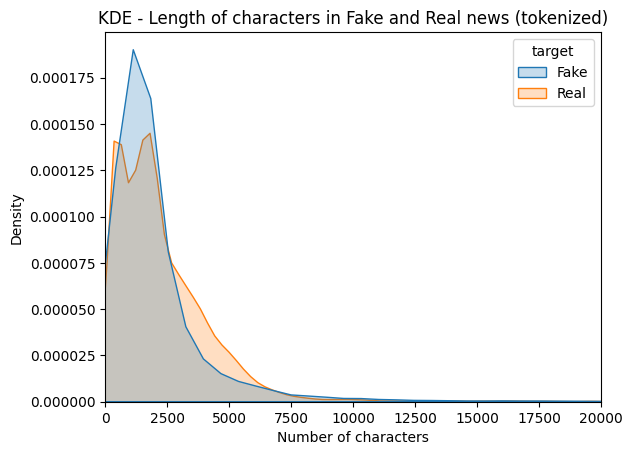

In [7]:
#contar el número de caracteres en el texto tokenizado
sns.kdeplot(data=dataset, x=dataset.Tokenized_text.str.len(), hue="target",fill=True)
plt.xlabel("Number of characters")
plt.ylabel("Density")
plt.title("KDE - Length of characters in Fake and Real news (tokenized)")
plt.xlim(0,20000)

Text(0.5, 1.0, 'Histogram - Length of characters in Fake and Real news (tokenized)')

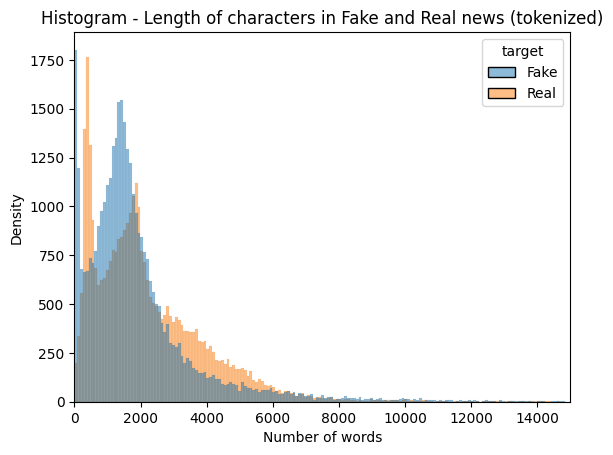

In [8]:
sns.histplot(data=dataset, x=dataset.Tokenized_text.str.len(), hue="target")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.xlim(0,15000)
plt.title("Histogram - Length of characters in Fake and Real news (tokenized)")

Text(0.5, 1.0, 'Histogram - Length of characters in Fake and Real news (Raw data)')

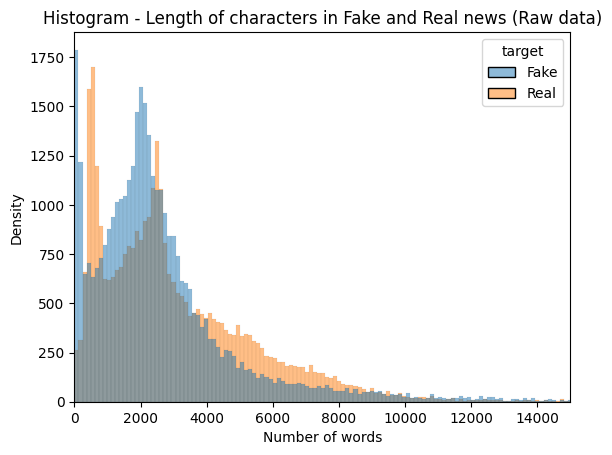

In [9]:
sns.histplot(data=dataset, x=dataset.text.str.len(), hue="target")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.xlim(0,15000)
plt.title("Histogram - Length of characters in Fake and Real news (Raw data)")

In [10]:
#Análisis de palabras por texto
def conteo_palabras(texto):
    numero_palabras = len(str.split(texto))     
    return numero_palabras

dataset["Tokenized_WordCount"] = dataset.Tokenized_text.apply(conteo_palabras)
dataset["Raw_WordCount"] = dataset.text.apply(conteo_palabras)

Text(0.5, 1.0, 'Histogram - Number of words in Fake and Real news (tokenized)')

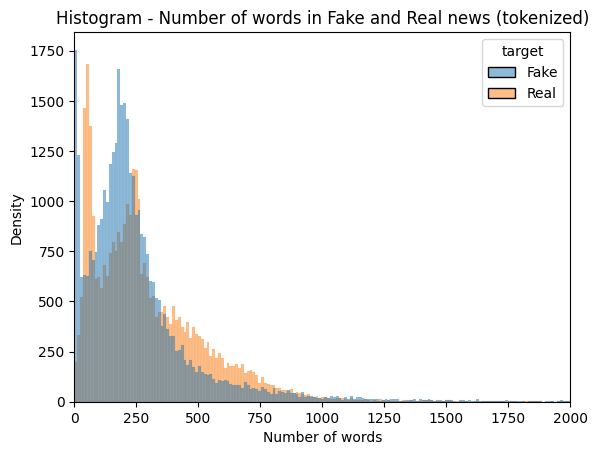

In [11]:
sns.histplot(data=dataset, x="Tokenized_WordCount", hue="target")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.xlim(0,2000)
plt.title("Histogram - Number of words in Fake and Real news (tokenized)")

Text(0.5, 1.0, 'Histogram - Number of words in Fake and Real news (Raw data)')

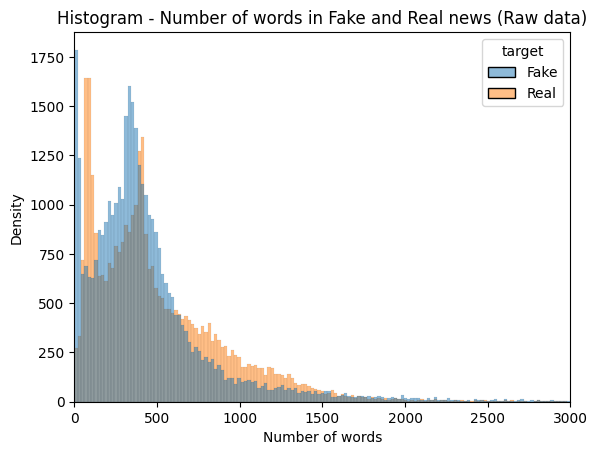

In [12]:
sns.histplot(data=dataset, x="Raw_WordCount", hue="target")
plt.xlabel("Number of words")
plt.ylabel("Density")
plt.xlim(0,3000)
plt.title("Histogram - Number of words in Fake and Real news (Raw data)")

In [13]:
#Revisar la frecuencia de aparición de palabras
from collections import Counter

#concatenamos todo el texto tokenizado en una sola línea. Dividimos Fake vs Real
texto_completo_fakes = ' '.join(dataset['Tokenized_text'][dataset['label']==1])
texto_completo_real = ' '.join(dataset['Tokenized_text'][dataset['label']==0])

#dividimos en palabras 
palabras_fakes = texto_completo_fakes.split()
palabras_real = texto_completo_real.split()

#Contamos la ocurrencia de palabras
contador_fake = Counter(palabras_fakes)
contador_real = Counter(palabras_real)

#10 palabras más frecuentes
print("Fake news, palabras más frecuentes:")
print(contador_fake.most_common(10))
print("-----"*9)
print("Real news, palabras más frecuentes:")
print(contador_real.most_common(10))

Fake news, palabras más frecuentes:
[('trump', 97852), ('people', 45936), ('said', 45639), ('one', 41507), ('would', 41342), ('clinton', 40647), ('president', 35244), ('us', 31566), ('like', 29851), ('hillary', 28829)]
---------------------------------------------
Real news, palabras más frecuentes:
[('said', 176115), ('trump', 97526), ('mr.', 59935), ('would', 59084), ('president', 45454), ('u.s.', 40768), ('people', 38540), ('new', 38208), ('one', 38087), ('state', 35010)]


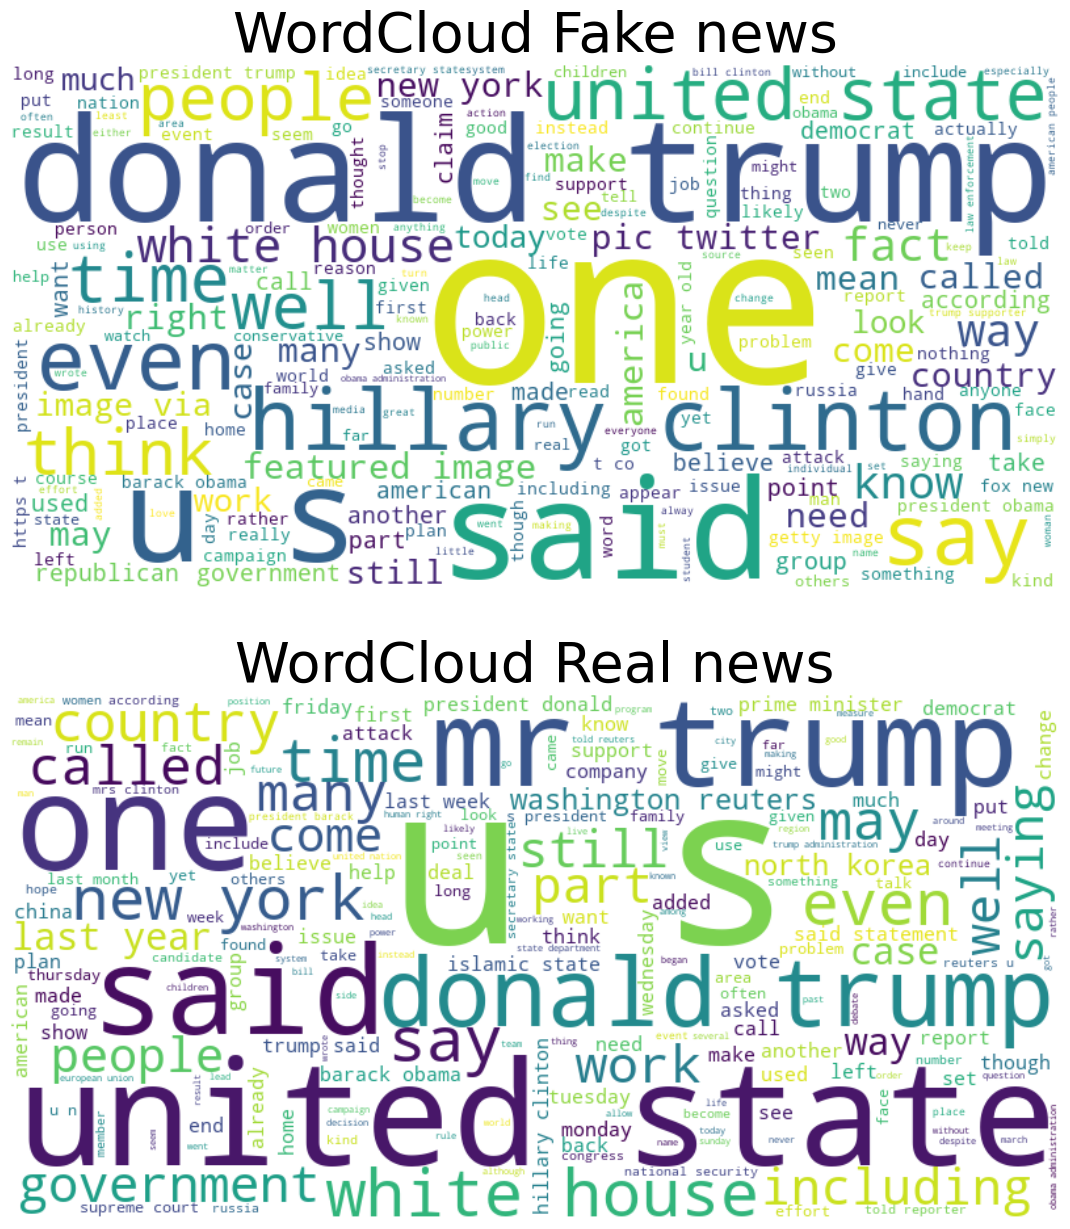

In [14]:
#WORDCLOUD 
from wordcloud import WordCloud

#Generamos el wordcloud
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(texto_completo_fakes)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(texto_completo_real)

#Mostramos usando matplotlib
plt.figure(figsize=(15, 15))

plt.subplot(2, 1, 1)  # Crear el primer subplot (WordCloud de "Fake")
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('WordCloud Fake news', fontsize=40)
plt.axis('off')

plt.subplot(2, 1, 2)  # Crear el segundo subplot (WordCloud de "Real")
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('WordCloud Real news', fontsize=40)
plt.axis('off')

plt.show()